In [66]:
import pandas as pd
import numpy as np 

In [67]:
# Read CSV file and convert into Dataframe
price_df = pd.read_csv('bengaluru_house_prices.csv')
price_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [68]:
# Show number of records and attributes
price_df.shape

(13320, 9)

In [69]:
# Check, how many null values each columns do have.
price_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [70]:
# Drop records which contains null values
price_df.dropna(inplace=True)

In [71]:
price_df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [72]:
price_df.shape

(7496, 9)

In [73]:
price_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00


In [74]:
# Check, what are the categories and total values of each category in area_type 
price_df['area_type'].value_counts()

area_type
Super built-up  Area    6017
Built-up  Area          1158
Plot  Area               269
Carpet  Area              52
Name: count, dtype: int64

In [75]:
price_df['availability'].value_counts()

availability
Ready To Move    5709
18-Dec            180
18-May            171
19-Dec            157
18-Apr            148
                 ... 
20-Feb              1
15-Jun              1
20-Mar              1
16-Mar              1
14-Jul              1
Name: count, Length: 74, dtype: int64

In [76]:
price_df['location'].value_counts()

location
Whitefield         397
Sarjapur  Road     310
Electronic City    236
Kanakpura Road     216
Thanisandra        212
                  ... 
Adarsh Nagar         1
S R Layout           1
Sadduguntepalya      1
BCC Layout           1
Abshot Layout        1
Name: count, Length: 634, dtype: int64

In [77]:
price_df['size'].value_counts()

size
2 BHK        3411
3 BHK        3012
1 BHK         353
4 BHK         347
4 Bedroom     193
3 Bedroom     120
5 Bedroom      16
2 Bedroom      16
1 RK           10
5 BHK           9
6 BHK           3
6 Bedroom       3
11 BHK          1
9 BHK           1
7 BHK           1
Name: count, dtype: int64

In [78]:
price_df['society'].value_counts()

society
GrrvaGr    80
PrarePa    71
Sryalan    59
Prtates    58
GMown E    56
           ..
SLnorMa     1
Heatee      1
Nihtsur     1
TGjraVa     1
RSntsAp     1
Name: count, Length: 2592, dtype: int64

In [79]:
price_df.loc[:,['size']]

,size
0,2 BHK
1,4 Bedroom
3,3 BHK
5,2 BHK
11,4 Bedroom
...,...
13313,3 BHK
13314,3 BHK
13315,5 Bedroom
13317,2 BHK


In [80]:
# Encode categorical data into numbers 
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
result = encoder.fit_transform(price_df.loc[:,['area_type']])
print(result)

[[3.]
 [2.]
 [3.]
 ...
 [0.]
 [0.]
 [3.]]


In [81]:
price_df['area_type'] = result

In [82]:
# Remove char values from each records.
sizes = price_df['size'].apply(lambda size: int(size.strip(' ')[0]))
price_df['size'] = sizes

In [83]:
price_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3.0,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,2.0,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
3,3.0,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
5,3.0,Ready To Move,Whitefield,2,DuenaTa,1170,2.0,1.0,38.00
11,2.0,Ready To Move,Whitefield,4,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,3.0,Ready To Move,Uttarahalli,3,Aklia R,1345,2.0,1.0,57.00
13314,3.0,Ready To Move,Green Glen Layout,3,SoosePr,1715,3.0,3.0,112.00
13315,0.0,Ready To Move,Whitefield,5,ArsiaEx,3453,4.0,0.0,231.00
13317,0.0,Ready To Move,Raja Rajeshwari Nagar,2,Mahla T,1141,2.0,1.0,60.00


In [84]:
# Assign value to specific availability
price_df.loc[price_df['availability'] != 'Ready To Move',['availability']] = 1
price_df.loc[price_df['availability'] == 'Ready To Move',['availability']] = 0

In [85]:
# Drop unessential column
price_df.drop(columns=['society'],inplace=True)

In [86]:
price_df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3.0,1,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,2.0,0,Chikka Tirupathi,4,2600,5.0,3.0,120.00
3,3.0,0,Lingadheeranahalli,3,1521,3.0,1.0,95.00
5,3.0,0,Whitefield,2,1170,2.0,1.0,38.00
11,2.0,0,Whitefield,4,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...
13313,3.0,0,Uttarahalli,3,1345,2.0,1.0,57.00
13314,3.0,0,Green Glen Layout,3,1715,3.0,3.0,112.00
13315,0.0,0,Whitefield,5,3453,4.0,0.0,231.00
13317,0.0,0,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00


In [87]:
price_df.location.value_counts()

location
Whitefield         397
Sarjapur  Road     310
Electronic City    236
Kanakpura Road     216
Thanisandra        212
                  ... 
Adarsh Nagar         1
S R Layout           1
Sadduguntepalya      1
BCC Layout           1
Abshot Layout        1
Name: count, Length: 634, dtype: int64

In [88]:
# Use LabelEncoder for encoding locations
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
result = encoder.fit_transform(price_df['location'])
print(result)

[210 149 387 ... 625 490 459]


In [89]:
price_df['location'] = result

In [90]:
price_df['location'].value_counts()

location
625    397
521    310
209    236
337    216
573    212
      ... 
33       1
509      1
511      1
73       1
32       1
Name: count, Length: 634, dtype: int64

In [91]:
price_df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3.0,1,210,2,1056,2.0,1.0,39.07
1,2.0,0,149,4,2600,5.0,3.0,120.00
3,3.0,0,387,3,1521,3.0,1.0,95.00
5,3.0,0,625,2,1170,2.0,1.0,38.00
11,2.0,0,625,4,2785,5.0,3.0,295.00


In [92]:
# Showes information of data set
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   float64
 1   availability  7496 non-null   object 
 2   location      7496 non-null   int32  
 3   size          7496 non-null   int64  
 4   total_sqft    7496 non-null   object 
 5   bath          7496 non-null   float64
 6   balcony       7496 non-null   float64
 7   price         7496 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 497.8+ KB


In [93]:
# Convert each record of area type into integer
price_df['area_type'] = price_df['area_type'].apply(lambda a_type: int(a_type))

In [94]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   int64  
 1   availability  7496 non-null   object 
 2   location      7496 non-null   int32  
 3   size          7496 non-null   int64  
 4   total_sqft    7496 non-null   object 
 5   bath          7496 non-null   float64
 6   balcony       7496 non-null   float64
 7   price         7496 non-null   float64
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 497.8+ KB


In [95]:
price_df['availability'] = price_df['availability'].apply(lambda x: int(x))

In [96]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   int64  
 1   availability  7496 non-null   int64  
 2   location      7496 non-null   int32  
 3   size          7496 non-null   int64  
 4   total_sqft    7496 non-null   object 
 5   bath          7496 non-null   float64
 6   balcony       7496 non-null   float64
 7   price         7496 non-null   float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 497.8+ KB


In [97]:
# Check that is there any values with combination of string and integer
price_df[price_df.total_sqft.str.contains(r'\D')].total_sqft

30       2100 - 2850
44           1330.74
122      3067 - 8156
137      1042 - 1105
142          1563.05
            ...     
12990    1804 - 2273
13059    1200 - 1470
13123        1331.95
13265    1133 - 1384
13299    2830 - 2882
Name: total_sqft, Length: 231, dtype: object

In [98]:
# Remove dash from values and convert into float
def convert_to_flot(sqft):
    if '-' in sqft:
        splitted_str = sqft.split('-')
        lower = float(splitted_str[0].strip())
        upper = float(splitted_str[1].strip())
        return np.mean([lower,upper])
    else:
        return sqft
result = price_df['total_sqft'].apply(lambda sqft: convert_to_flot(sqft))
print(result)

0        1056
1        2600
3        1521
5        1170
11       2785
         ... 
13313    1345
13314    1715
13315    3453
13317    1141
13318    4689
Name: total_sqft, Length: 7496, dtype: object


In [99]:
price_df['total_sqft'] = result

In [100]:
# Check is there any specific values in data set
price_df.isin(['1500Sq. Meter']).any()

area_type       False
availability    False
location        False
size            False
total_sqft       True
bath            False
balcony         False
price           False
dtype: bool

In [101]:
import re
pattern = re.compile(r'[-+]?(?:\d*\.*\d+)')
def remove_str(sqft):
    try:
        pattern_array = pattern.findall(sqft)
        return float(pattern_array[0])
    except TypeError:
        return float(sqft)
result = price_df['total_sqft'].apply(lambda sqft: remove_str(sqft))
print(result)

0        1056.0
1        2600.0
3        1521.0
5        1170.0
11       2785.0
          ...  
13313    1345.0
13314    1715.0
13315    3453.0
13317    1141.0
13318    4689.0
Name: total_sqft, Length: 7496, dtype: float64


In [102]:
price_df['total_sqft'] = result

In [103]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7496 non-null   int64  
 1   availability  7496 non-null   int64  
 2   location      7496 non-null   int32  
 3   size          7496 non-null   int64  
 4   total_sqft    7496 non-null   float64
 5   bath          7496 non-null   float64
 6   balcony       7496 non-null   float64
 7   price         7496 non-null   float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 497.8 KB


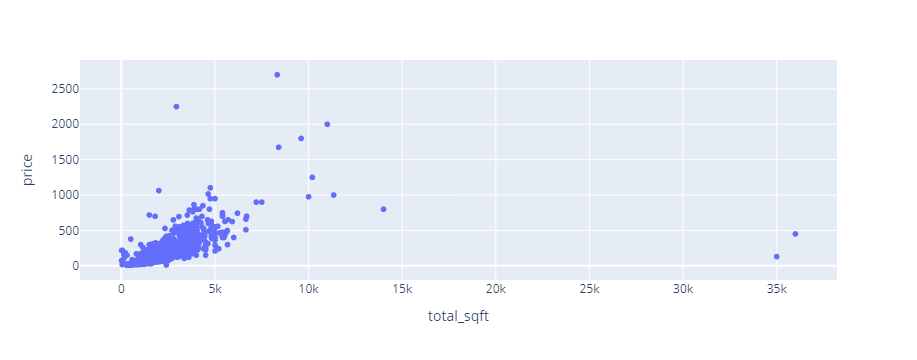

In [105]:
import plotly.express as px

px.scatter(price_df,x='total_sqft',y='price')

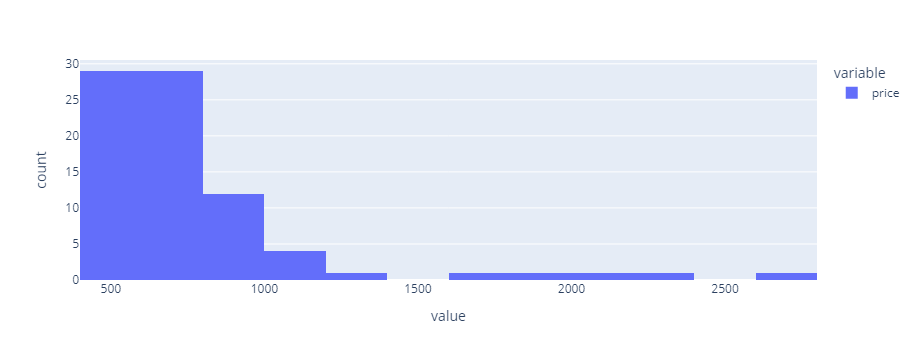

In [106]:
px.histogram(price_df.loc[price_df.price > 500,['price']])

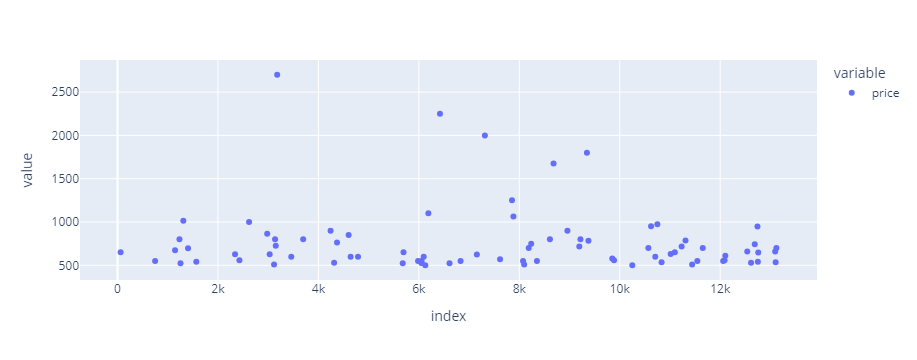

In [107]:
px.scatter(price_df.loc[price_df.price > 500,['price']])

In [109]:
# Outlier removal with mean and std
mean_price = price_df.price.mean()
std_price = price_df.price.std()
upper_limit = mean_price + 3*std_price
lower_limit = mean_price - 3*std_price

In [110]:
# If outlier percentage is below 25 then remove those
(len(price_df[(price_df.price > upper_limit)])/len(price_df))*100

1.6942369263607255

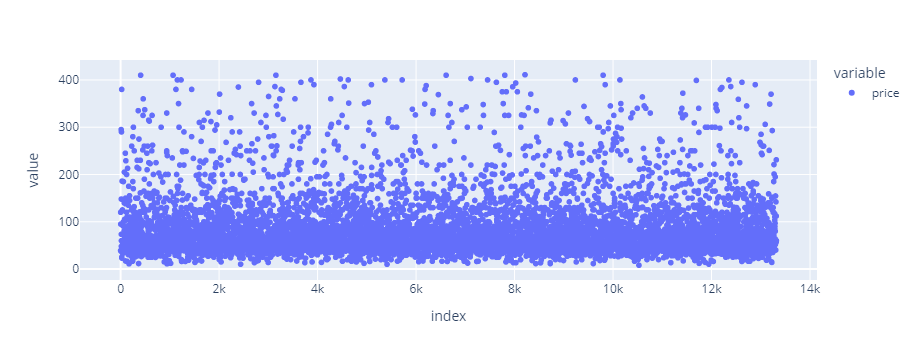

In [111]:
px.scatter(price_df.loc[(price_df.price > lower_limit) & (price_df.price < upper_limit),['price']])

In [112]:
price_df = price_df[(price_df.price > lower_limit) & (price_df.price < upper_limit)]

In [113]:
price_df.shape

(7369, 8)

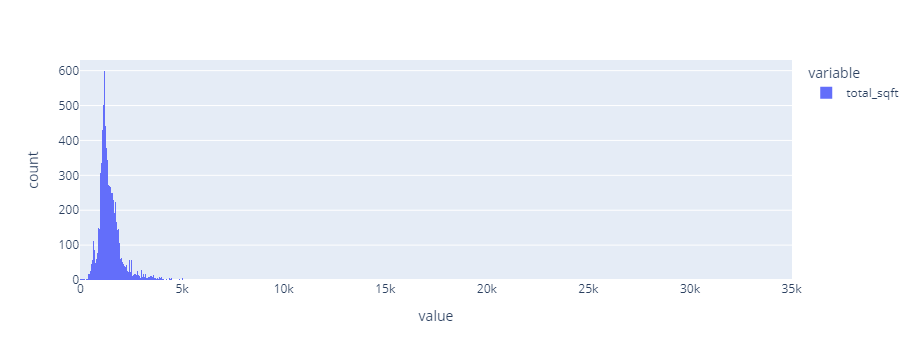

In [114]:
px.histogram(price_df['total_sqft'])

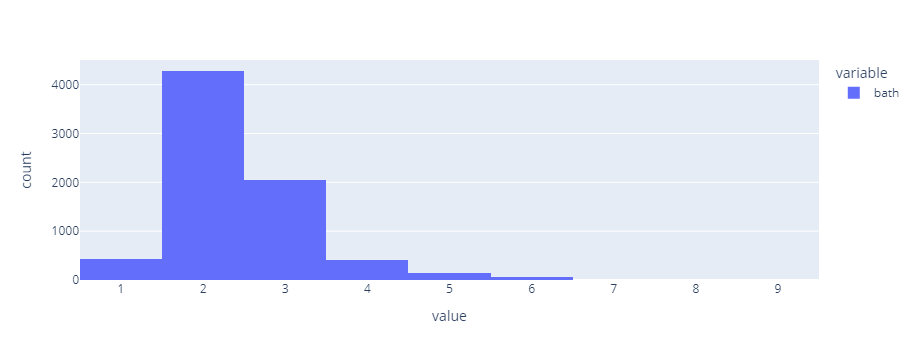

In [115]:
px.histogram(price_df['bath'])

In [116]:
price_df['bath'].value_counts()

bath
2.0    4280
3.0    2044
1.0     428
4.0     412
5.0     147
6.0      52
7.0       4
9.0       2
Name: count, dtype: int64

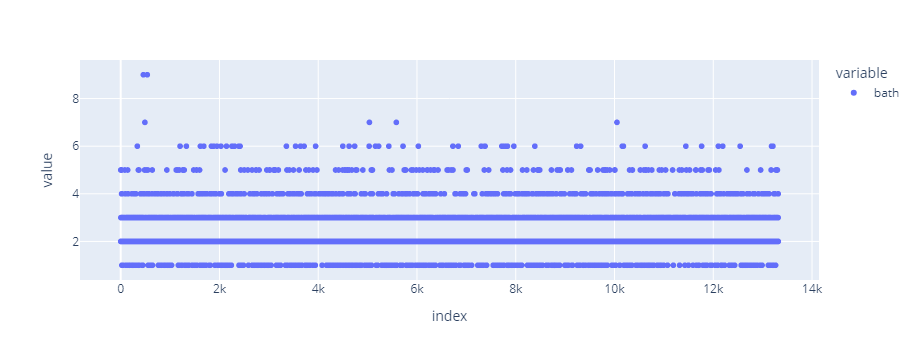

In [117]:
px.scatter(price_df['bath'])

In [118]:
mean_bath = price_df.bath.mean()
std_bath = price_df.bath.std()
bath_lower_limit = mean_bath - 3*std_bath
bath_upper_limit = mean_bath + 3*std_bath

In [119]:
bath_upper_limit

4.931802251955971

In [120]:
(len(price_df[price_df.bath > bath_upper_limit])/len(price_df))*100

2.781924277378206

In [121]:
price_df = price_df[(price_df.bath > bath_lower_limit) & (price_df.bath < bath_upper_limit)]

In [122]:
price_df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,1,210,2,1056.0,2.0,1.0,39.07
3,3,0,387,3,1521.0,3.0,1.0,95.00
5,3,0,625,2,1170.0,2.0,1.0,38.00
12,3,0,24,2,1000.0,2.0,1.0,38.00
14,2,0,520,3,2250.0,3.0,2.0,148.00
...,...,...,...,...,...,...,...,...
13308,0,0,91,3,1527.0,3.0,1.0,142.00
13313,3,0,590,3,1345.0,2.0,1.0,57.00
13314,3,0,234,3,1715.0,3.0,3.0,112.00
13315,0,0,625,5,3453.0,4.0,0.0,231.00


In [123]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7164 entries, 0 to 13317
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7164 non-null   int64  
 1   availability  7164 non-null   int64  
 2   location      7164 non-null   int32  
 3   size          7164 non-null   int64  
 4   total_sqft    7164 non-null   float64
 5   bath          7164 non-null   float64
 6   balcony       7164 non-null   float64
 7   price         7164 non-null   float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 475.7 KB
